In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# read in data, fix formatting as the dataset needed to be transposed and columns renamed
df = pd.read_csv('cpi_data.csv', header= None).transpose()
df.columns = df.iloc[0]
df = df[1:].set_index('variable')

df

,all_items_value,apparel_value,energy_value,food_value,gas_value,medical_value,transportation_value
variable,,,,,,,
1957-01-01,27.67,44.3,21.3,28.4,NaN,16.7,23.5
1957-02-01,27.8,44.3,21.4,28.7,NaN,16.7,23.7
1957-03-01,27.86,44.5,21.5,28.6,NaN,16.8,23.7
1957-04-01,27.93,44.4,21.6,28.6,NaN,16.9,23.8
1957-05-01,28.0,44.5,21.6,28.7,NaN,16.9,23.9
...,...,...,...,...,...,...,...
2022-03-01,287.708,127.044,305.469,295.809,380.763,588.223,341.104
2022-04-01,288.663,126.087,297.233,298.379,357.377,591.331,351.573
2022-05-01,291.474,126.927,308.839,301.879,372.063,593.887,356.018


## **Exploratory Data Analysis**

In [27]:
# what columns we are working with
df.columns

Index(['all_items_value', 'apparel_value', 'energy_value', 'food_value',
       'gas_value', 'medical_value', 'transportation_value'],
      dtype='object', name=0)

In [28]:
# find number of null values per column
df.isnull().sum()

0
all_items_value           0
apparel_value             0
energy_value              0
food_value                0
gas_value               120
medical_value             0
transportation_value      0
dtype: int64

In [29]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 787 entries, 1957-01-01 to 2022-07-01
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   all_items_value       787 non-null    object
 1   apparel_value         787 non-null    object
 2   energy_value          787 non-null    object
 3   food_value            787 non-null    object
 4   gas_value             667 non-null    object
 5   medical_value         787 non-null    object
 6   transportation_value  787 non-null    object
dtypes: object(7)
memory usage: 49.2+ KB


In [30]:
# Shape of the dataset
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])


Number of rows: 787
Number of columns: 7


In [31]:
#  find dtypes of each column
print(df.dtypes[:])

# change dtype of each column into floats from objects
df = df.astype('float64')
print('New data types:', df.dtypes[:])

0
all_items_value         object
apparel_value           object
energy_value            object
food_value              object
gas_value               object
medical_value           object
transportation_value    object
dtype: object
New data types: 0
all_items_value         float64
apparel_value           float64
energy_value            float64
food_value              float64
gas_value               float64
medical_value           float64
transportation_value    float64
dtype: object


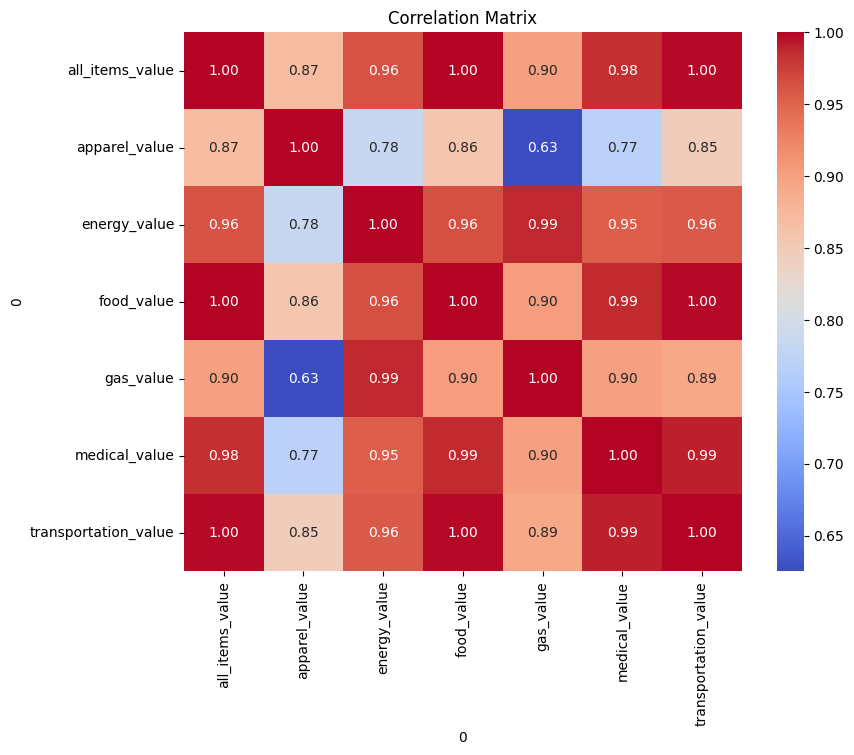

In [32]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## **Feature Engineering and Data Cleaning**

To do for next meeting:

Add graphs in EDA section

Handle null values:
  - **fill in values with the mean**

Transformation
  - make data on the same scale

Outliers/Anomalies

What I Tried:

Used fill the mean values method


For future:

Try filling the null values



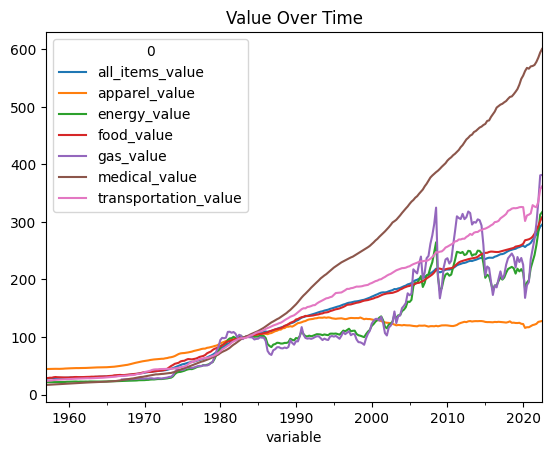

In [33]:
df.index=pd.to_datetime(df.index)
quarterly_data = df.resample('Q').mean()
quarterly_data.plot(title='Value Over Time')
plt.show()

In [34]:
df = df.fillna(df['gas_value'].mean())
df

,all_items_value,apparel_value,energy_value,food_value,gas_value,medical_value,transportation_value
variable,,,,,,,
1957-01-01,27.670,44.300,21.300,28.400,133.560076,16.700,23.500
1957-02-01,27.800,44.300,21.400,28.700,133.560076,16.700,23.700
1957-03-01,27.860,44.500,21.500,28.600,133.560076,16.800,23.700
1957-04-01,27.930,44.400,21.600,28.600,133.560076,16.900,23.800
1957-05-01,28.000,44.500,21.600,28.700,133.560076,16.900,23.900
...,...,...,...,...,...,...,...
2022-03-01,287.708,127.044,305.469,295.809,380.763000,588.223,341.104
2022-04-01,288.663,126.087,297.233,298.379,357.377000,591.331,351.573
2022-05-01,291.474,126.927,308.839,301.879,372.063000,593.887,356.018


In [35]:
df.isnull().sum()

0
all_items_value         0
apparel_value           0
energy_value            0
food_value              0
gas_value               0
medical_value           0
transportation_value    0
dtype: int64

In [36]:
df.std()

0
all_items_value          79.242770
apparel_value            32.110692
energy_value             75.892316
food_value               79.648364
gas_value                79.775954
medical_value           176.847228
transportation_value     99.835213
dtype: float64

In [40]:
# run only once or it will keep removing rows

from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

# Shape of the dataset without outliers
print('Number of rows:', df.shape[0]) # only removes 3 rows from dataset
print('Number of columns:', df.shape[1])

Number of rows: 784
Number of columns: 7
